In [1]:
import numpy as np

import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import scipy as sp 
from scipy import stats

from matplotlib import pyplot as plt 
import seaborn as sns
sns.set_style()

# 二項分布

表が出る確率0.5のコインを4回投げて，表がx回出る確率の分布

<BarContainer object of 5 artists>

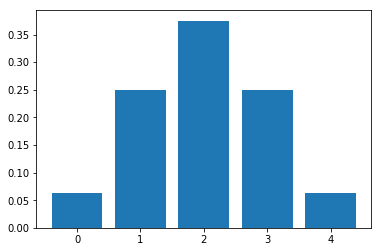

In [10]:
n= 4
p = 0.5

x = np.arange(0, n+1, 1)
y = stats.binom.pmf(x, n, p)
plt.bar(x,y)

表が出る確率0.1のコインを4回投げて，表がx回出る確率の分布

<BarContainer object of 5 artists>

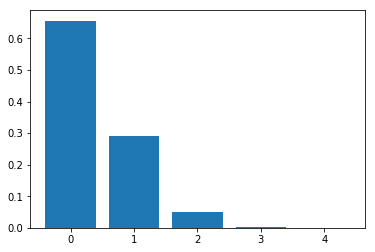

In [12]:
n= 4
p = 0.1

x = np.arange(0, n+1, 1)
y = stats.binom.pmf(x, n, p)
plt.bar(x,y)

コインを4回投げて表が2回出たときの，確率pの尤度

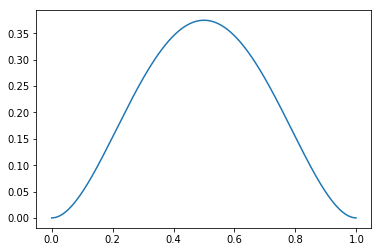

In [13]:
x = 2
n = 4
p = np.arange(0.0, 1.0, 0.001)
L = stats.binom.pmf(x, n, p)

plt.plot(p, L)

In [14]:
Lmax = np.max(L)
phat = p[L == Lmax]

print("最大尤度：", Lmax)
print("最大尤度をとるパラメータ：", phat)

最大尤度： 0.3750000000000001
最大尤度をとるパラメータ： [0.5]


コインを10回投げて表が1回出たときの，確率pの尤度

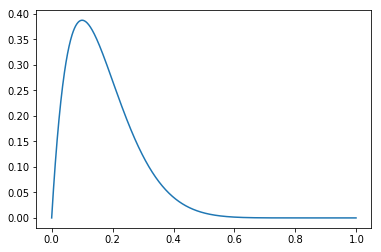

In [19]:
x = 1
n = 10
p = np.arange(0.0, 1.0, 0.001)
L = stats.binom.pmf(x, n, p)

plt.plot(p, L)

In [20]:
Lmax = np.max(L)
phat = p[L == Lmax]

print("最大尤度：", Lmax)
print("最大尤度をとるパラメータ：", phat)

最大尤度： 0.3874204890000005
最大尤度をとるパラメータ： [0.1]


# 正規分布

参考：https://qiita.com/kenmatsu4/items/b28d1b3b3d291d0cc698

$$N(50,10)$$，平均50，分散10^2の正規分布

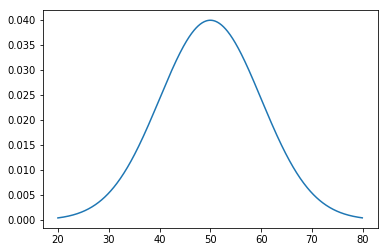

In [21]:
mu = 50
sigma = 10

x = np.arange(20, 80, step=0.1)
y = stats.norm.pdf(x, mu, sigma)

plt.plot(x, y)

$$N(50,10)$$にしたがうデータを20個抽出する

In [24]:
n = 20
data = np.random.normal(50, 10, n)
data

array([55.43390033, 54.21945785, 63.25406462, 44.23063735, 63.27189797,
       55.61189908, 41.42717551, 52.3164785 , 47.1953676 , 41.93146639,
       70.54492371, 53.50876987, 62.47333606, 50.70085112, 53.86445507,
       52.25900582, 54.15603322, 40.40411568, 57.87302181, 55.5630291 ])

抽出したデータについて尤度を求める

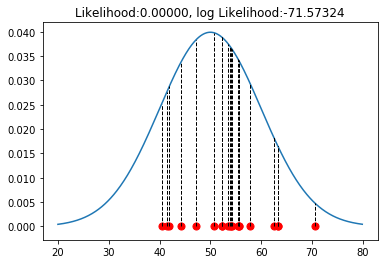

In [25]:
mu = 50
sigma = 10

x = np.arange(20, 80, step=0.1)
y = stats.norm.pdf(x, mu, sigma)

L = np.prod([stats.norm.pdf(x_i, mu, sigma) for x_i in data])
l = np.log(L)

# 正規分布の密度関数の描画
plt.plot(x, y)

# データ点の描画
plt.scatter(data, np.zeros_like(data), c="r", s=50)
for d in data:
    plt.plot([d, d], [0, stats.norm.pdf(d, mu, sigma)], "k--", lw=1)

plt.title("Likelihood:{0:.5f}, log Likelihood:{1:.5f}".format(L, l))

plt.show()

平均の尤度関数

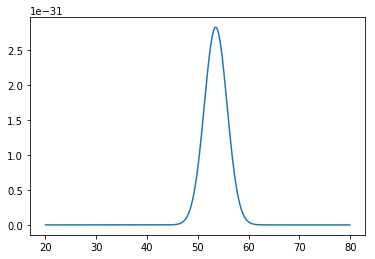

In [26]:
list_Lm = []
sigma = 10

mm = np.arange(20, 80, step=0.1)
for m in mm:
    list_Lm.append(np.prod([stats.norm.pdf(x_i, m, sigma) for x_i in data]))

plt.plot(mm, (list_Lm))

In [27]:
Lmmax = np.max(list_Lm)
mhat = mm[list_Lm == Lmmax]

print("m最大尤度：", Lmmax)
print("m最大尤度をとるパラメータ：", mhat)

m最大尤度： 2.83005140870007e-31
m最大尤度をとるパラメータ： [53.5]


分散の尤度関数

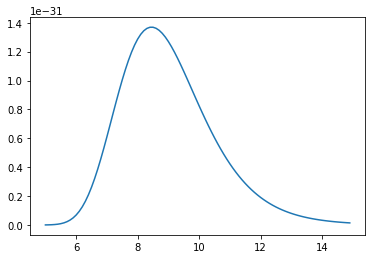

In [28]:
list_Ls = []
mu = 50

ss = np.arange(5, 15, step=0.1)
for s in ss:
    list_Ls.append(np.prod([stats.norm.pdf(x_i, mu, s) for x_i in data]))

plt.plot(ss, (list_Ls))

In [29]:
Lsmax = np.max(list_Ls)
shat = ss[list_Ls == Lsmax]

print("s最大尤度：", Lsmax)
print("s最大尤度をとるパラメータ：", shat)

s最大尤度： 1.3687007359264432e-31
s最大尤度をとるパラメータ： [8.5]


平均，分散両方に関する尤度関数

In [30]:
mu = np.arange(20, 80, step=0.1)
s = np.arange(5, 15, step=0.1)
MU, S = np.meshgrid(mu, s)

Z = np.array([(np.prod([stats.norm.pdf(x_i, a, b) for x_i in data]))
              for a, b in zip(MU.flatten(), S.flatten())])

Text(0, 0.5, 's')

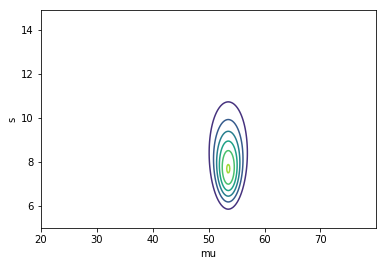

In [31]:
#等高線グラフ
plt.contour(MU, S, Z.reshape(MU.shape))
#plt.contourf(MU, S, Z.reshape(MU.shape))
plt.xlabel("mu")
plt.ylabel("s")

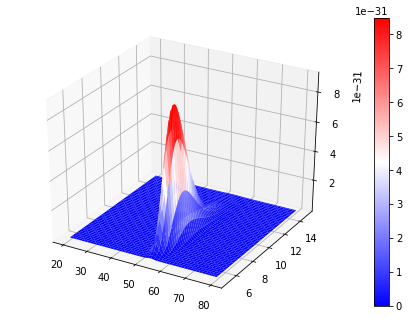

In [32]:
#3次元グラフ
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

surf = ax.plot_surface(MU, S, Z.reshape(MU.shape), cmap='bwr')
fig.colorbar(surf)
plt.show()